In [18]:
# 기본 분석도구

import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  matplotlib as mpl
from tqdm import tqdm

## 시각화 한글 
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 폰트
# plt.rcParams['font.family'] = 'NanumGothicCoding' # 리눅스 폰트


# 텍스트 정제 관련도구

from konlpy.tag import  Okt
import re
import konlpy
okt = Okt()
import nltk

# Word Cloud
from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

In [2]:
df = pd.read_csv('제주스제주양배추쇼핑몰리뷰크롤링.csv')

In [5]:
df.head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...


In [8]:
tokens = []
for words in tqdm(df.내용정제):
    word = okt.nouns(str(words))
    tokens.append(word)

100%|██████████| 1660/1660 [00:13<00:00, 121.58it/s]


In [9]:
tokenss = []
for a in tqdm(tokens):
    for b in a:
        tokenss.append(b)

100%|██████████| 1660/1660 [00:00<00:00, 317373.72it/s]


In [10]:
len(tokenss)

17158

In [11]:
tokenss[:100]

['주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
 '동안',
 '복용',
 '식도염',
 '걸',
 '고생',
 '즙',
 '호전',
 '가장',
 '번',
 '주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
 '동안',
 '복용',
 '식도염',
 '걸',
 '고생',
 '즙',
 '호전',
 '가장',
 '요인',
 '것',
 '혹시',
 '주문',
 '고민',
 '분',
 '번',
 '주문',
 '생각',
 '요즘',
 '바이러스',
 '기승',
 '배달',
 '고민',
 '주문',
 '한지',
 '일만',
 '도착',
 '항상',
 '몸',
 '마스크',
 '꼭꼭',
 '착용',
 '건강',
 '식품',
 '생산',
 '사시',
 '동안',
 '버시',
 '일',
 '리뷰',
 '배송',
 '재료',
 '이외',
 '꿀',
 '단',
 '것',
 '달',
 '걱정',
 '생각',
 '달',
 '것',
 '수',
 '것',
 '혼합',
 '채소',
 '추출',
 '액',
 '배송',
 '재료',
 '이외',
 '꿀',
 '단',
 '것',
 '달',
 '걱정',
 '생각',
 '달',
 '것',
 '수',
 '것',
 '혼합',
 '채소',
 '추출',
 '액',
 '함유',
 '그']

In [12]:
new_tokens =[]
for token in tokenss:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:                       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [16]:
new_tokens[:50]

['주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
 '동안',
 '복용',
 '식도염',
 '걸',
 '고생',
 '즙',
 '호전',
 '가장',
 '번',
 '주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
 '동안',
 '복용',
 '식도염',
 '걸',
 '고생',
 '즙',
 '호전',
 '가장',
 '요인',
 '것',
 '혹시',
 '주문',
 '고민',
 '분',
 '번',
 '주문',
 '생각',
 '요즘',
 '바이러스',
 '기승',
 '배달',
 '고민',
 '주문',
 '한지',
 '일만']

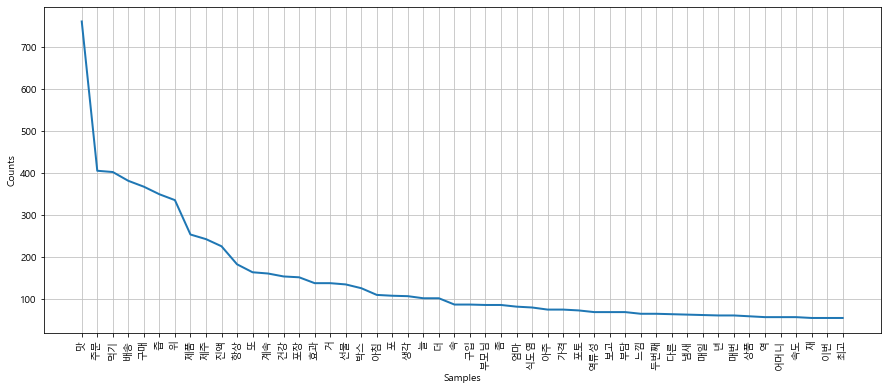

In [32]:
양배추즙리뷰 = nltk.Text(new_tokenss, name='양배추즙리뷰')
plt.figure(figsize=(15,6))
양배추즙리뷰.plot(50)
plt.show()

In [20]:
len(양배추즙리뷰)

17158

In [ ]:
['주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
 '동안',
 '복용',
 '식도염',
 '걸',
 '고생',
 '즙',
 '호전',
 '가장',
 '번',
 '주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
...
 '배달',
 '고민',
 '주문',
 '한지',
 '일만'

In [31]:
stop_words = '''요 저 안 달 걸 번 요 저 안 달 것 때 개 리뷰 펼치기 리뷰펼치기 양배추 브로콜리''' 
stop_list = stop_words.split()
new_token_list = []
for token in new_tokens:
    if token not in stop_list:
        new_token_list.append(token)
new_tokens = new_token_list
new_tokenss = [token for token in new_tokens if token not in stop_list]

In [33]:
data = 양배추즙리뷰.vocab().most_common(300)
data[:50]

[('맛', 761),
 ('주문', 405),
 ('먹기', 402),
 ('배송', 381),
 ('구매', 367),
 ('즙', 349),
 ('위', 335),
 ('제품', 253),
 ('제주', 242),
 ('진액', 225),
 ('항상', 182),
 ('또', 163),
 ('계속', 160),
 ('건강', 153),
 ('포장', 151),
 ('효과', 137),
 ('거', 137),
 ('선물', 134),
 ('박스', 125),
 ('아침', 109),
 ('포', 107),
 ('생각', 106),
 ('늘', 101),
 ('더', 101),
 ('속', 86),
 ('구입', 86),
 ('부모님', 85),
 ('좀', 85),
 ('엄마', 81),
 ('식도염', 79),
 ('아주', 74),
 ('가격', 74),
 ('포토', 72),
 ('역류성', 68),
 ('보고', 68),
 ('부담', 68),
 ('느낌', 64),
 ('두번째', 64),
 ('다른', 63),
 ('냄새', 62),
 ('매일', 61),
 ('년', 60),
 ('매번', 60),
 ('상품', 58),
 ('역', 56),
 ('어머니', 56),
 ('속도', 56),
 ('재', 54),
 ('이번', 54),
 ('최고', 54)]

In [36]:
wc = WordCloud(
    width=1920, height=1080,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.1,
    background_color='white'
).generate_from_frequencies(dict(data))

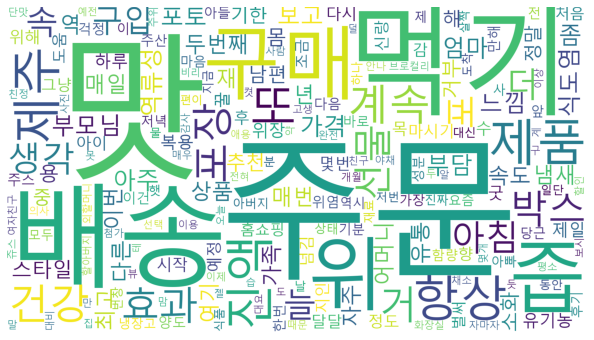

In [37]:
plt.figure(figsize=(12,6))

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
mask = np.array(Image.open('염경환.jpg'))
image_colors = ImageColorGenerator(mask)

In [ ]:
wc = WordCloud(
    width=1920, height=1080,
    font_path='NanumGothicCoding',
    relative_scaling=0.3,
    mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
df['작성년월']

210304    10
210310     9
210507     8
210312     8
210826     8
          ..
200404     1
190706     1
200115     1
210505     1
190925     1
Name: 작성년월일, Length: 892, dtype: int64

In [61]:
df['작성월']= df.작성년월일.apply(lambda x : str(x)[2:4])

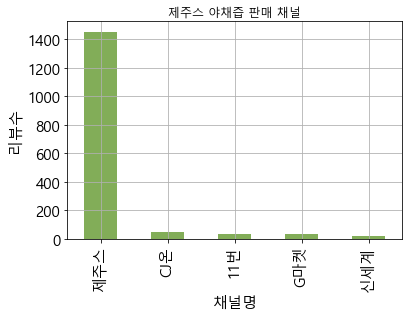

In [126]:
plt.Figure(figsize=(20,12))
df.채널.value_counts()[:5].plot.bar(fontsize=(15),color='#82AD58')
plt.title('제주스 야채즙 판매 채널')
plt.xlabel('채널명',size=(15))
plt.ylabel('리뷰수',size=(15))
plt.grid()
plt.savefig('판매채널.png',dpi=350)

In [68]:

df.groupby([df.작성년,df.작성월]).count()

평점  내용  작성시간  채널  작성년월일  내용정제  작성년월
작성년 작성월                                     
10  04    1   1     1   1      1     1     1
    21    2   2     2   2      2     2     2
    25    1   1     1   1      1     1     1
    73    2   2     2   2      2     2     2
11  02    2   2     2   2      2     2     2
...      ..  ..   ...  ..    ...   ...   ...
95  03    1   1     1   1      1     1     1
    21    1   1     1   1      1     1     1
97  21    1   1     1   1      1     1     1
99  10    1   1     1   1      1     1     1
    32    1   1     1   1      1     1     1

[148 rows x 7 columns]

In [92]:
mask_양배추 = np.array(Image.open('G:\\내 드라이브\\Data\\내일프로젝트(홀푸드코리아)\\양배추.jpg'))
image_colors_양배추 = ImageColorGenerator(mask_양배추)

In [97]:
image_colors_양배추

In [103]:
wc_양배추 = WordCloud(
    width=1920, height=1080,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.3,
    mask=mask_양배추,
    background_color='black',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc_양배추.to_array()

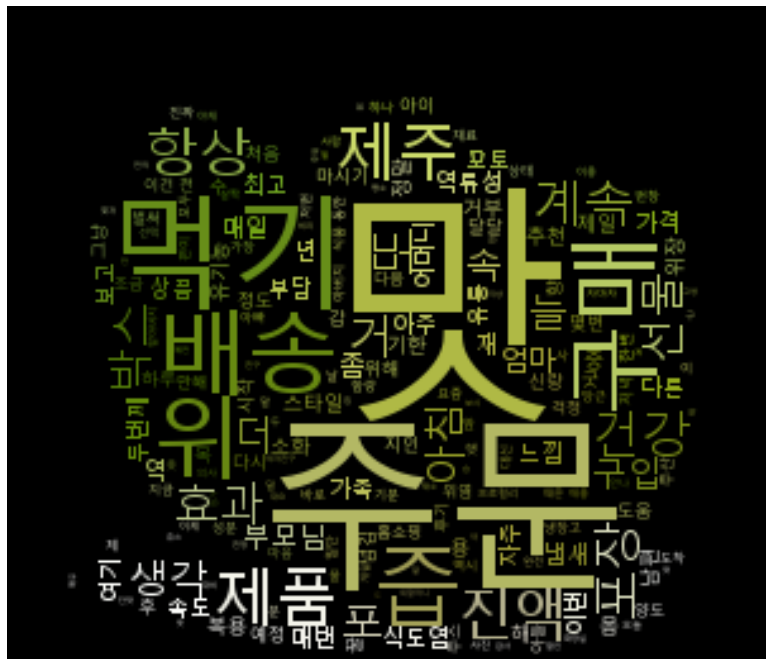

In [104]:
plt.figure(figsize=(20,12))
plt.imshow(wc_양배추.recolor(color_func=image_colors_양배추),interpolation='bilinear')
plt.axis('off')
plt.show()

In [105]:
df.내용정제.cont

,평점,내용,작성시간,채널,작성년월일,내용정제,작성년월,작성년,작성월
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,2003,20,03
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,2103,21,03
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,2102,21,02
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,2101,21,01
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,2105,21,05
...,...,...,...,...,...,...,...,...,...
1655,5,hrgh****21.07.28.만족합니다 만족합니다.만족합니다 만족합니다.리뷰펼치기,210728,제주스,210728,만족합니다 만족합니다만족합니다 만족합니다리뷰펼치기,2107,21,07
1656,5,dltk****21.09.16.좋습니다.좋습니다..좋습니다.좋습니다..리뷰펼치기,210916,제주스,210916,좋습니다좋습니다좋습니다좋습니다리뷰펼치기,2109,21,09
1657,4,naki****19.09.25.참 좋아요! 11111참 좋아요! 11111리뷰펼치기,1909251111111111,제주스,190925,참 좋아요 참 좋아요 리뷰펼치기,1909,19,09
1658,4,*e*****21.08.03.gooooodgoooood리뷰펼치기,210803,옥션a,210803,리뷰펼치기,2108,21,08


In [106]:
data = 양배추즙리뷰.vocab().most_common(300)
data[:50]

[('맛', 761),
 ('주문', 405),
 ('먹기', 402),
 ('배송', 381),
 ('구매', 367),
 ('즙', 349),
 ('위', 335),
 ('제품', 253),
 ('제주', 242),
 ('진액', 225),
 ('항상', 182),
 ('또', 163),
 ('계속', 160),
 ('건강', 153),
 ('포장', 151),
 ('효과', 137),
 ('거', 137),
 ('선물', 134),
 ('박스', 125),
 ('아침', 109),
 ('포', 107),
 ('생각', 106),
 ('늘', 101),
 ('더', 101),
 ('속', 86),
 ('구입', 86),
 ('부모님', 85),
 ('좀', 85),
 ('엄마', 81),
 ('식도염', 79),
 ('아주', 74),
 ('가격', 74),
 ('포토', 72),
 ('역류성', 68),
 ('보고', 68),
 ('부담', 68),
 ('느낌', 64),
 ('두번째', 64),
 ('다른', 63),
 ('냄새', 62),
 ('매일', 61),
 ('년', 60),
 ('매번', 60),
 ('상품', 58),
 ('역', 56),
 ('어머니', 56),
 ('속도', 56),
 ('재', 54),
 ('이번', 54),
 ('최고', 54)]

In [120]:
df['키워드'] = df.내용정제.apply(lambda x: '맛' if (x.__contains__('맛') or x.__contains__('먹기')) else
                                            '편의성' if (x.__contains__('배송') or x.__contains__('구매')) else
                                            '재료' if x.__contains__ ('주행') else
                                            '가격' if x.__contains__('보조금') else
                                            '제주' if x.__contains__('제주') else
                                            '기타' 
                                ) 

In [121]:
df['키워드']

0       기타
1        맛
2        맛
3        맛
4        맛
        ..
1655    기타
1656    기타
1657    기타
1658    기타
1659    기타
Name: 키워드, Length: 1660, dtype: object

In [ ]:
df[df.카페명 =='전기차동호회(투플럭스)'][df['키워드'] != '미분류'].groupby([df.키워드,df.평가]).키워드.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('키워드별긍부정.png',dpi=350)

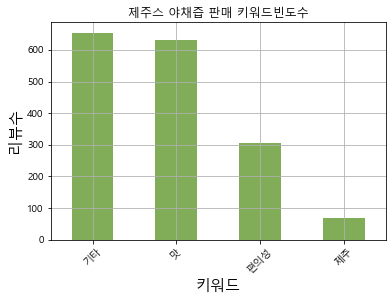

In [130]:
df['키워드'].value_counts().plot.bar(color='#82AD58')
plt.xticks(rotation=45)
plt.grid()
plt.title('제주스 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.ylabel('리뷰수',size=(15))
plt.savefig('키워드.png',dpi=350)

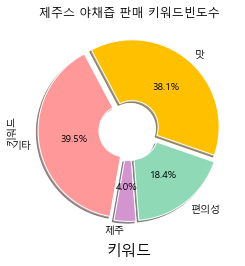

In [142]:
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df['키워드'].value_counts().plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('제주스 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.savefig('키워드pie.png',dpi=350)